In [1]:
import model_utils
import pandas as pd

merged_hornsea = pd.read_parquet("preprocessed_hornsea_with_energy.parquet")
merged_pes = pd.read_parquet("preprocessed_pes_with_energy.parquet")

Train model on wind and energy data at once

In [ ]:
import model_utils
import pandas as pd

merged_hornsea = pd.read_parquet("preprocessed_hornsea_with_energy.parquet")
merged_pes = pd.read_parquet("preprocessed_pes_with_energy.parquet")

columns_to_add = list()

for col in merged_hornsea.columns:
    if col not in merged_pes.columns:
        columns_to_add.append(col)

merged_all = merged_pes.merge(merged_hornsea[columns_to_add], left_index = True, right_index = True)
merged_all["energy"] = merged_all["Solar_MWh_credit"] + merged_all["Wind_MWh_credit"]
merged_all.drop(["Solar_MWh_credit", "Wind_MWh_credit"], axis = 1, inplace = True)

from Preprocessing import *
feature_engineerer_all = FeatureEngineerer(labels_to_remove=  ["energy"], columns_to_ohe = ['unavailabilityType', 'affectedUnit'], label = ["energy"])
feature_engineerer_all.perform_feature_engineering(merged_all, deployment = False, labels_to_remove=  ["energy"])

import numpy as np
quantiles = np.arange(0.1, 1.0, 0.1).round(2)

# Specify model save directory
model_save_dir_qr = "lgbm_mode"

lgbm_model = model_utils.LGBMRegressorModel(feature_engineerer_all, quantiles, model_save_dir=model_save_dir_qr, load_pretrained=False)
lgbm_model.train_and_predict()  # This will skip training for already loaded models

def pinball_score(self):
        """pinball score implemetation"""

        score = []
        try:
            df = pd.DataFrame(self.q_predictions)
        except:
            df = pd.DataFrame()
            for k in self.q_predictions.keys():
                df[k] = pd.DataFrame(self.q_predictions[k])
        for qu in self.quantiles:
            score.append(self.pinball(y=df["true"], q=df[str(qu)], alpha=qu).mean())
        return sum(score) / len(score)

print(pinball_score(lgbm_model))
# import plotly.express as px
# df.index = feature_engineerer_all.y_test.index
# px.line(df, y = ["true", "0.5"])

In [1]:
from Preprocessing import * 

prep = Preprocessing()

merged_hornsea = prep.perform_preprocessing_pipeline(geo_data_dict = {"dwd_icon_eu_hornsea":"nc_files", "ncep_gfs_hornsea":"nc_files"},
                                              deployment = False, merge_with_outage_data = True, json_file_path = "nc_files/REMIT", energy_data_dict = {"Energy_data":"csv_files"},
                                              non_numerical_columns = ["unavailabilityType", "affectedUnit"],
                                              fft = False,
                                              #columns_to_fft = ["temp_diff", "solar_down_rad_diff", "wind_dir_sin", "wind_dir_cos", "wind_dir_100_sin", "wind_dir_100_cos"]
                                              )

merged_pes = prep.perform_preprocessing_pipeline(geo_data_dict = {"dwd_icon_eu_pes":"nc_files", "ncep_gfs_pes":"nc_files"},
          deployment = False, merge_with_outage_data = False, energy_data_dict = {"Energy_data":"csv_files"},
                                              non_numerical_columns = ["unavailabilityType", "affectedUnit"],
                                              fft = False, ) 

merged_demand = prep.perform_preprocessing_pipeline(geo_data_dict = {"dwd_icon_eu_demand":"nc_files", "ncep_gfs_demand":"nc_files"},
          deployment = False, merge_with_outage_data = True, energy_data_dict = {"Energy_data":"csv_files"},
                                              non_numerical_columns = ["unavailabilityType", "affectedUnit"],
                                              fft = False, )

INFO:root:Perform data cleaning on the weather data...
INFO:root:Merge weather stations...
INFO:root:Merge with outages data (REMIT)...
c:\Users\danie\Documents\AWP2_Repo\awp2\Preprocessing.py:328: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  outages_df = pd.concat([outages_df, json_data_with_date_ranges])
c:\Users\danie\Documents\AWP2_Repo\awp2\Preprocessing.py:328: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outages_df = pd.concat([outages_df, json_data_with_date_ranges])
INFO:root:Merge with energy data...
INFO:root:Pr

In [7]:
merged_hornsea.to_parquet("preprocessed_hornsea_with_energy.parquet")
merged_pes.to_parquet("preprocessed_pes_with_energy.parquet")
merged_demand.to_parquet("preprocessed_demand_with_energy.parquet")

In [1]:
import importlib
import Preprocessing
importlib.reload(Preprocessing)
import model_utils
import pandas as pd

merged_hornsea = pd.read_parquet("preprocessed_hornsea_with_energy.parquet")
merged_pes = pd.read_parquet("preprocessed_pes_with_energy.parquet")

feature_engineerer_wind = Preprocessing.FeatureEngineerer(label = 'Wind_MWh_credit', columns_to_ohe = ['unavailabilityType', 'affectedUnit'])
feature_engineerer_wind.perform_feature_engineering(merged_hornsea, deployment = False)

feature_engineerer_solar = Preprocessing.FeatureEngineerer(label = "Solar_MWh_credit")
feature_engineerer_solar.perform_feature_engineering(merged_pes, deployment = False)

merged_pes_simple = merged_pes[['solar_down_rad', 'Solar_MWh_credit', 'Wind_MWh_credit']]
feature_engineerer_solar_baseline = Preprocessing.FeatureEngineerer(label = 'Solar_MWh_credit')
feature_engineerer_solar_baseline.perform_feature_engineering(merged_pes_simple, deployment = False)

merged_hornsea_simple = merged_hornsea[['wind_speed_100', 'Solar_MWh_credit', 'Wind_MWh_credit']]
feature_engineerer_wind_baseline = Preprocessing.FeatureEngineerer(label = 'Wind_MWh_credit')
feature_engineerer_wind_baseline.perform_feature_engineering(merged_hornsea_simple, deployment = False)

In [3]:
lgbm_model_wind.pinball_score()

21.39025810038712

In [2]:
importlib.reload(model_utils)
import numpy as np
quantiles = np.arange(0.1, 1.0, 0.1).round(2)

# Specify model save directory
model_save_dir_qr = "lgbm_model_wind"

lgbm_model_wind = model_utils.LGBMRegressorModel(feature_engineerer_wind, quantiles, model_save_dir=model_save_dir_qr, load_pretrained=False)
lgbm_model_wind.train_and_predict()  # This will skip training for already loaded models
print(f"Quantile Regressor Pinball Score: {lgbm_model_wind.pinball_score()}")

c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 23.1292	valid's quantile: 22.1622


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 23.1217	valid's quantile: 22.5066
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 10.6685	valid's quantile: 12.1681
[400]	train's quantile: 10.5924	valid's quantile: 12.7072
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 8.80346	valid's quantile: 11.6305
[400]	train's quantile: 8.55853	valid's quantile: 11.9337


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 18.8095	valid's quantile: 17.2754
[400]	train's quantile: 15.0393	valid's quantile: 13.8912


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 17.6986	valid's quantile: 17.4979
[400]	train's quantile: 13.5977	valid's quantile: 13.7473
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 11.4193	valid's quantile: 11.5944
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 10.0781	valid's quantile: 11.1637


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 11.677	valid's quantile: 12.0488
[400]	train's quantile: 10.712	valid's quantile: 11.9435


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 10.3432	valid's quantile: 11.3181
[400]	train's quantile: 9.27225	valid's quantile: 11.2358
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 10.959	valid's quantile: 12.3582
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 8.87959	valid's quantile: 11.6817
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 12.1522	valid's quantile: 12.0136
[400]	train's quantile: 11.6401	valid's quantile: 11.525
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 11.5787	valid's quantile: 11.6484
[400]	train's quantile: 10.9616	valid's quantile: 11.2101


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 16.8751	valid's quantile: 16.0179


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 16.0303	valid's quantile: 15.9286


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 11.7323	valid's quantile: 12.3702
[400]	train's quantile: 10.7378	valid's quantile: 12.5335


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 10.4413	valid's quantile: 11.3004
[400]	train's quantile: 9.3152	valid's quantile: 11.1923
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 10.8671	valid's quantile: 12.0324
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 9.06143	valid's quantile: 11.5315


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 11.7854	valid's quantile: 11.8668


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 10.3674	valid's quantile: 11.4378


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 12.3635	valid's quantile: 12.4998
[400]	train's quantile: 11.1923	valid's quantile: 11.8071


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 11.4448	valid's quantile: 11.6597
[400]	train's quantile: 10.1684	valid's quantile: 11.0598


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 12.9995	valid's quantile: 13.1338
[400]	train's quantile: 11.2612	valid's quantile: 12.0809


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 11.845	valid's quantile: 12.2186
[400]	train's quantile: 10.1908	valid's quantile: 11.2699
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 13.6027	valid's quantile: 13.6161
[400]	train's quantile: 11.3607	valid's quantile: 11.94
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 12.7888	valid's quantile: 12.9573
[400]	train's quantile: 10.1073	valid's quantile: 11.3349


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 12.1417	valid's quantile: 12.5459
[400]	train's quantile: 10.8673	valid's quantile: 12.2386


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 11.0125	valid's quantile: 11.7488
[400]	train's quantile: 9.5994	valid's quantile: 11.196


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 21.8113	valid's quantile: 20.3515
[400]	train's quantile: 18.0719	valid's quantile: 16.5749


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 21.5666	valid's quantile: 21.1065
[400]	train's quantile: 17.1256	valid's quantile: 16.8682


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 12.7641	valid's quantile: 11.7643


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 11.567	valid's quantile: 11.4857
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 11.2189	valid's quantile: 11.923
[400]	train's quantile: 10.8164	valid's quantile: 12.4927
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 9.1595	valid's quantile: 11.4748
[400]	train's quantile: 8.75889	valid's quantile: 11.8313
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 13.9277	valid's quantile: 13.2671
[400]	train's quantile: 11.5507	valid's quantile: 11.5346
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 12.704	valid's quantile: 12.8078
[400]	train's quantile: 10.0916	valid's quantile: 11.2226


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 20.6173	valid's quantile: 19.6783


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 20.6342	valid's quantile: 19.9738
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 11.5349	valid's quantile: 11.5358
[400]	train's quantile: 10.8614	valid's quantile: 11.0825
Saved Quantile Regressor model for quantile 0.1 to lgbm_model_wind\lgbm_model_quantile_0.1.pkl
[200]	train's quantile: 21.5631	valid's quantile: 21.1941


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[400]	train's quantile: 18.6194	valid's quantile: 18.7641


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 21.0484	valid's quantile: 20.9576
[400]	train's quantile: 18.0375	valid's quantile: 18.5144


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 38.6984	valid's quantile: 36.9225
[400]	train's quantile: 29.1771	valid's quantile: 28.2235


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 39.9592	valid's quantile: 38.0223
[400]	train's quantile: 29.4769	valid's quantile: 28.4479


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 37.8973	valid's quantile: 36.4746
[400]	train's quantile: 29.6345	valid's quantile: 28.543


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 37.7112	valid's quantile: 36.4748
[400]	train's quantile: 28.8553	valid's quantile: 28.2095
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 17.1015	valid's quantile: 17.6474
[400]	train's quantile: 17.1061	valid's quantile: 17.6045
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 16.2672	valid's quantile: 17.3845
[400]	train's quantile: 16.053	valid's quantile: 17.3256
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 15.5723	valid's quantile: 18.5601
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 13.8075	valid's quantile: 18.3802


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 41.1902	valid's quantile: 39.1705
[400]	train's quantile: 33.1314	valid's quantile: 31.4162


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 40.9292	valid's quantile: 39.6666
[400]	train's quantile: 32.1601	valid's quantile: 31.4463
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 15.4729	valid's quantile: 19.1899
[400]	train's quantile: 15.3943	valid's quantile: 19.8341
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 13.5412	valid's quantile: 17.8126
[400]	train's quantile: 12.9161	valid's quantile: 18.3793


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 22.5961	valid's quantile: 21.9087
[400]	train's quantile: 18.7442	valid's quantile: 19.158


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 21.1615	valid's quantile: 21.4497
[400]	train's quantile: 16.8689	valid's quantile: 18.5497
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 17.5574	valid's quantile: 18.4491
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 15.6561	valid's quantile: 17.8816


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 37.7672	valid's quantile: 36.8584


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 37.2273	valid's quantile: 36.2148


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 19.3884	valid's quantile: 19.4088


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 17.7678	valid's quantile: 18.9599
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 15.8083	valid's quantile: 18.0813
[400]	train's quantile: 15.6173	valid's quantile: 18.4754
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 14.1392	valid's quantile: 17.9166
[400]	train's quantile: 13.7169	valid's quantile: 18.1175
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 17.5017	valid's quantile: 17.4957
[400]	train's quantile: 17.3806	valid's quantile: 17.573
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 15.8615	valid's quantile: 17.2796
[400]	train's quantile: 15.6382	valid's quantile: 17.262
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 18.5459	valid's quantile: 18.834
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 17.3538	valid's quantile: 18.5635

c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 19.1401	valid's quantile: 18.7917


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 17.9349	valid's quantile: 18.3889
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 21.1795	valid's quantile: 20.7811
[400]	train's quantile: 17.8619	valid's quantile: 17.857
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 20.0315	valid's quantile: 20.2917
[400]	train's quantile: 16.5592	valid's quantile: 17.5123


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 23.7304	valid's quantile: 23.2339
[400]	train's quantile: 19.4247	valid's quantile: 19.6185


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 23.4033	valid's quantile: 22.8855
[400]	train's quantile: 18.9879	valid's quantile: 19.2615


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 19.6145	valid's quantile: 19.783
[400]	train's quantile: 17.2312	valid's quantile: 18.6879


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 17.771	valid's quantile: 18.8966
[400]	train's quantile: 15.3354	valid's quantile: 17.7942


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 34.4043	valid's quantile: 32.7526
[400]	train's quantile: 26.3259	valid's quantile: 25.3008


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 33.5044	valid's quantile: 32.8444
[400]	train's quantile: 25.1814	valid's quantile: 25.0154
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 16.2789	valid's quantile: 17.2028
[400]	train's quantile: 16.0168	valid's quantile: 17.0969
Saved Quantile Regressor model for quantile 0.2 to lgbm_model_wind\lgbm_model_quantile_0.2.pkl


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 37.0456	valid's quantile: 35.8439


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 35.676	valid's quantile: 34.8689
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 18.9805	valid's quantile: 22.1909
[400]	train's quantile: 18.7398	valid's quantile: 22.5915
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 17.3555	valid's quantile: 21.6105
[400]	train's quantile: 16.8807	valid's quantile: 21.7997
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 18.9155	valid's quantile: 23.1536
[400]	train's quantile: 18.6021	valid's quantile: 23.604
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 16.9521	valid's quantile: 21.636
[400]	train's quantile: 16.1827	valid's quantile: 21.9638


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 27.2627	valid's quantile: 26.9759


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 24.9019	valid's quantile: 25.6834


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 26.9853	valid's quantile: 26.8806
[400]	train's quantile: 22.3011	valid's quantile: 23.9613


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 24.779	valid's quantile: 25.7854
[400]	train's quantile: 20.2495	valid's quantile: 22.7223
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 19.9323	valid's quantile: 22.1585
[400]	train's quantile: 18.9621	valid's quantile: 22.2806
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 18.3053	valid's quantile: 21.822
[400]	train's quantile: 17.3619	valid's quantile: 21.7273


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 46.3953	valid's quantile: 44.9246


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 45.8173	valid's quantile: 44.1152
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 18.5643	valid's quantile: 23.245
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 16.5762	valid's quantile: 22.063


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 46.3296	valid's quantile: 44.8978


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 45.627	valid's quantile: 44.3371


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 51.4428	valid's quantile: 49.7123
[400]	train's quantile: 39.1303	valid's quantile: 38.058


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 50.6996	valid's quantile: 49.0734
[400]	train's quantile: 38.2672	valid's quantile: 37.2342
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 20.0644	valid's quantile: 21.4689
[400]	train's quantile: 19.9396	valid's quantile: 21.6413
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 18.9915	valid's quantile: 21.353
[400]	train's quantile: 18.7489	valid's quantile: 21.3857
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 18.9938	valid's quantile: 23.0522
[400]	train's quantile: 18.6715	valid's quantile: 23.4078
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 16.5898	valid's quantile: 22.0761
[400]	train's quantile: 15.9573	valid's quantile: 22.5219
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 18.7501	valid's quantile: 23.2887
Training until validation scores don't improve for 10 roun

c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 51.6578	valid's quantile: 49.645


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 50.7181	valid's quantile: 49.2359
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 19.8533	valid's quantile: 21.5599
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 18.9089	valid's quantile: 21.3439


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 46.7613	valid's quantile: 44.9515
[400]	train's quantile: 34.7552	valid's quantile: 33.4769


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 45.4878	valid's quantile: 44.3343
[400]	train's quantile: 33.2569	valid's quantile: 32.9374
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 22.9008	valid's quantile: 24.1796
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 22.167	valid's quantile: 23.6225


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 36.9379	valid's quantile: 35.7427
[400]	train's quantile: 27.8218	valid's quantile: 27.517


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 35.5746	valid's quantile: 35.0487
[400]	train's quantile: 25.7688	valid's quantile: 26.7586


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 24.4063	valid's quantile: 24.8281


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 22.7579	valid's quantile: 24.0484


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 56.3753	valid's quantile: 54.189


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 55.5371	valid's quantile: 53.6386
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 18.6804	valid's quantile: 20.9768
Saved Quantile Regressor model for quantile 0.3 to lgbm_model_wind\lgbm_model_quantile_0.3.pkl


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 57.014	valid's quantile: 55.0416


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 55.4844	valid's quantile: 53.6763
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 21.8056	valid's quantile: 24.7671
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 20.5844	valid's quantile: 23.7985


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 50.4332	valid's quantile: 48.8935
[400]	train's quantile: 36.1729	valid's quantile: 35.638


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 49.2053	valid's quantile: 47.8806
[400]	train's quantile: 34.3873	valid's quantile: 34.6776
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 23.1014	valid's quantile: 26.4136
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 20.8764	valid's quantile: 25.1181
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 22.4577	valid's quantile: 24.788
[400]	train's quantile: 21.8099	valid's quantile: 24.3611
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 21.3899	valid's quantile: 23.8669
[400]	train's quantile: 20.8159	valid's quantile: 23.7993


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 56.8167	valid's quantile: 54.817


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 55.3789	valid's quantile: 53.5004
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 22.7292	valid's quantile: 26.1677
[400]	train's quantile: 20.8924	valid's quantile: 25.5012
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 20.5303	valid's quantile: 25.1956
[400]	train's quantile: 18.932	valid's quantile: 24.569


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 34.6956	valid's quantile: 34.2591


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 32.4699	valid's quantile: 32.8512


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 56.7692	valid's quantile: 54.8569


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 55.4304	valid's quantile: 53.4286


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 27.9524	valid's quantile: 29.4582


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 25.5517	valid's quantile: 27.7224
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 23.0044	valid's quantile: 26.0284
[400]	train's quantile: 21.4837	valid's quantile: 25.0548
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 20.9727	valid's quantile: 25.0102
[400]	train's quantile: 19.8085	valid's quantile: 24.3006
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 22.8585	valid's quantile: 25.7935
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 20.8077	valid's quantile: 25.1499
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 20.8568	valid's quantile: 25.9223
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 18.5181	valid's quantile: 24.3547


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 69.1067	valid's quantile: 66.2762
[400]	train's quantile: 53.6905	valid's quantile: 51.9061


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 68.1444	valid's quantile: 65.1945
[400]	train's quantile: 52.349	valid's quantile: 50.5131
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 23.4511	valid's quantile: 25.5147
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 22.2492	valid's quantile: 24.3906


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 44.0453	valid's quantile: 42.8357
[400]	train's quantile: 32.5013	valid's quantile: 32.7476


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 42.9432	valid's quantile: 41.862
[400]	train's quantile: 30.9193	valid's quantile: 31.4192


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 34.3856	valid's quantile: 34.0337


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 32.3071	valid's quantile: 32.8162


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 31.1079	valid's quantile: 31.305


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 28.8567	valid's quantile: 29.795


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 50.4063	valid's quantile: 48.9007


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 49.2285	valid's quantile: 47.9307


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 50.6734	valid's quantile: 49.159
[400]	train's quantile: 36.2122	valid's quantile: 35.8492


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 49.1853	valid's quantile: 47.9332
[400]	train's quantile: 34.2498	valid's quantile: 34.7473
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 21.2008	valid's quantile: 23.4061
[400]	train's quantile: 20.7617	valid's quantile: 23.1809
Saved Quantile Regressor model for quantile 0.4 to lgbm_model_wind\lgbm_model_quantile_0.4.pkl
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 25.6365	valid's quantile: 28.9364
Did not meet early stopping. Best iteration is:
[250]	train's quantile: 23.9631	valid's quantile: 27.286
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 23.9467	valid's quantile: 27.3123
Did not meet early stopping. Best iteration is:
[250]	train's quantile: 22.4132	valid's quantile: 26.1012


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 43.7418	valid's quantile: 42.5817
[400]	train's quantile: 31.4466	valid's quantile: 32.468


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 41.5811	valid's quantile: 41.2912
[400]	train's quantile: 28.9059	valid's quantile: 30.9984
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 21.9651	valid's quantile: 27.1148
[400]	train's quantile: 21.7095	valid's quantile: 27.1503
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 19.5732	valid's quantile: 25.6765
[400]	train's quantile: 19.0735	valid's quantile: 25.6967
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 22.3821	valid's quantile: 26.0503
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 21.6067	valid's quantile: 24.5134


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 65.8292	valid's quantile: 63.084
[400]	train's quantile: 46.5988	valid's quantile: 45.4964


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 63.7941	valid's quantile: 61.3809
[400]	train's quantile: 44.2983	valid's quantile: 43.8465
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 25.449	valid's quantile: 28.5995
[400]	train's quantile: 22.5096	valid's quantile: 26.2212
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 24.2471	valid's quantile: 27.2143
[400]	train's quantile: 21.8784	valid's quantile: 24.4295
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 21.8295	valid's quantile: 26.5886
[400]	train's quantile: 21.3496	valid's quantile: 26.6707
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 19.354	valid's quantile: 25.9461
[400]	train's quantile: 18.6504	valid's quantile: 25.9274
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 25.4976	valid's quantile: 29.1074
[400]	train's quantile: 22.0863	valid's quantile: 26.4749
T

c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 30.6121	valid's quantile: 31.4697
[400]	train's quantile: 25.3106	valid's quantile: 27.9134


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 28.0491	valid's quantile: 29.9814
[400]	train's quantile: 22.8495	valid's quantile: 26.9789


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 38.098	valid's quantile: 37.785


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 35.7917	valid's quantile: 36.4433


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 43.7865	valid's quantile: 42.7291


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 41.6819	valid's quantile: 41.382


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 30.5279	valid's quantile: 31.5881


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 27.6919	valid's quantile: 30.0145


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 80.6505	valid's quantile: 76.9562


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 79.6261	valid's quantile: 76.2146


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 50.3863	valid's quantile: 48.6479


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 48.4648	valid's quantile: 47.3938
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 22.494	valid's quantile: 26.1174
[400]	train's quantile: 22.19	valid's quantile: 26.1184
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 21.3751	valid's quantile: 24.8796
[400]	train's quantile: 21.0631	valid's quantile: 24.9042


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 38.3325	valid's quantile: 38.2244
[400]	train's quantile: 29.0552	valid's quantile: 30.3935


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 36.4256	valid's quantile: 36.7551
[400]	train's quantile: 27.0667	valid's quantile: 28.9922
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 22.5619	valid's quantile: 26.0794
[400]	train's quantile: 22.8171	valid's quantile: 26.5685
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 21.5904	valid's quantile: 24.4797
[400]	train's quantile: 21.4083	valid's quantile: 24.509
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 21.5224	valid's quantile: 26.3836
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 19.3558	valid's quantile: 25.6855
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 23.5556	valid's quantile: 27.6551
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 21.4226	valid's quantile: 26.8908
Training until validation scores don't improve for 10 r

c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[400]	train's quantile: 42.1802	valid's quantile: 42.2532


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 60.8278	valid's quantile: 58.7546
[400]	train's quantile: 40.904	valid's quantile: 41.1933


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 80.3477	valid's quantile: 76.4673
[400]	train's quantile: 58.1242	valid's quantile: 56.097


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 79.1994	valid's quantile: 75.4623
[400]	train's quantile: 56.4657	valid's quantile: 54.8585


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 28.5846	valid's quantile: 31.3998
[400]	train's quantile: 23.9665	valid's quantile: 28.1776


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 25.0617	valid's quantile: 29.3959
[400]	train's quantile: 20.3945	valid's quantile: 26.6816


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 71.6368	valid's quantile: 68.3682
[400]	train's quantile: 49.6976	valid's quantile: 48.3686


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 70.3885	valid's quantile: 67.2987
[400]	train's quantile: 47.7815	valid's quantile: 47.0057


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 35.0121	valid's quantile: 36.2343
[400]	train's quantile: 26.7409	valid's quantile: 30.019


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 32.7371	valid's quantile: 34.5998
[400]	train's quantile: 23.9064	valid's quantile: 28.3579
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 21.5906	valid's quantile: 26.9853
[400]	train's quantile: 21.3604	valid's quantile: 27.0266
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 18.4713	valid's quantile: 25.7649
[400]	train's quantile: 17.9938	valid's quantile: 25.7051


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 54.1297	valid's quantile: 52.8026


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 52.5064	valid's quantile: 51.3963


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 40.3178	valid's quantile: 40.6836


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 38.9506	valid's quantile: 39.4512
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 21.6997	valid's quantile: 26.6688
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 19.5528	valid's quantile: 26.0369
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 21.8089	valid's quantile: 26.8159
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 19.7803	valid's quantile: 25.6017
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 21.3399	valid's quantile: 26.5297
[400]	train's quantile: 21.2476	valid's quantile: 26.6608
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 19.216	valid's quantile: 25.8025
[400]	train's quantile: 18.8378	valid's quantile: 25.7825


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 62.7096	valid's quantile: 60.406


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 61.5394	valid's quantile: 59.2449
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 24.6508	valid's quantile: 29.2077
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 22.4892	valid's quantile: 28.6732


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 80.4429	valid's quantile: 76.4812


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 79.2116	valid's quantile: 75.5029
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 21.892	valid's quantile: 26.7266
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 19.3018	valid's quantile: 25.3186


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 62.5133	valid's quantile: 60.2558
[400]	train's quantile: 42.178	valid's quantile: 42.2474


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 60.8303	valid's quantile: 58.7053
[400]	train's quantile: 40.9221	valid's quantile: 41.1899
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 24.6779	valid's quantile: 29.2102
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 23.1554	valid's quantile: 27.5781
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 21.2796	valid's quantile: 26.5768
[400]	train's quantile: 21.0619	valid's quantile: 26.8822
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 19.1535	valid's quantile: 25.3592
[400]	train's quantile: 18.5334	valid's quantile: 25.4046
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 24.2359	valid's quantile: 29.0123
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 22.062	valid's quantile: 28.8022


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 46.4964	valid's quantile: 46.0139


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 45.1467	valid's quantile: 44.8846
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 19.4547	valid's quantile: 25.5455
Saved Quantile Regressor model for quantile 0.6 to lgbm_model_wind\lgbm_model_quantile_0.6.pkl
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[168]	train's quantile: 19.3662	valid's quantile: 25.9997
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 16.9531	valid's quantile: 24.199
Early stopping, best iteration is:
[265]	train's quantile: 16.7082	valid's quantile: 24.1408
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 19.7008	valid's quantile: 25.2173
Early stopping, best iteration is:
[239]	train's quantile: 19.6478	valid's quantile: 25.1536
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 18.3424	valid's quantile: 23.3218
Did not meet early stopping. Bes

c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 75.9555	valid's quantile: 72.3726
[400]	train's quantile: 51.2143	valid's quantile: 50.1313


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 75.166	valid's quantile: 71.6172
[400]	train's quantile: 49.6211	valid's quantile: 49.1635


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 85.655	valid's quantile: 81.2669


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 84.7492	valid's quantile: 80.4738


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 30.5756	valid's quantile: 33.2551


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 27.8193	valid's quantile: 31.6437


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 48.4786	valid's quantile: 47.9245


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 46.7602	valid's quantile: 46.6916


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 66.8717	valid's quantile: 64.2952


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 65.3618	valid's quantile: 62.988


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 49.3791	valid's quantile: 48.6407
[400]	train's quantile: 32.5906	valid's quantile: 34.5988


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 46.7124	valid's quantile: 46.9091
[400]	train's quantile: 29.0651	valid's quantile: 32.4497
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 19.4615	valid's quantile: 25.7247
[400]	train's quantile: 19.3553	valid's quantile: 25.8739
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 17.0371	valid's quantile: 24.4027
[400]	train's quantile: 16.5638	valid's quantile: 24.4678
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 20.2952	valid's quantile: 26.6169
[400]	train's quantile: 19.4455	valid's quantile: 25.7186
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 18.5268	valid's quantile: 25.3441
[400]	train's quantile: 17.4188	valid's quantile: 24.4861
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 20.1787	valid's quantile: 25.1917
Training until validation scores don't improve for 10 rou

c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 35.8259	valid's quantile: 37.6995
[400]	train's quantile: 25.6215	valid's quantile: 29.6454


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 32.5504	valid's quantile: 35.5014
[400]	train's quantile: 22.1198	valid's quantile: 27.8259


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 75.9417	valid's quantile: 72.4089


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 75.1837	valid's quantile: 71.6982
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 20.3657	valid's quantile: 26.5225
[400]	train's quantile: 19.4354	valid's quantile: 25.8017
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 18.2241	valid's quantile: 25.1122
[400]	train's quantile: 16.7903	valid's quantile: 24.1391


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 34.7487	valid's quantile: 36.589
[400]	train's quantile: 25.4488	valid's quantile: 28.9617


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 33.3346	valid's quantile: 35.2814
[400]	train's quantile: 23.4872	valid's quantile: 27.401
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 19.4851	valid's quantile: 25.206
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 18.1723	valid's quantile: 23.2005


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 30.6138	valid's quantile: 33.1168


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 28.0837	valid's quantile: 31.5136
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 20.9129	valid's quantile: 26.1924
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 20.0271	valid's quantile: 23.5917
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 19.3667	valid's quantile: 26.1244
[400]	train's quantile: 19.3406	valid's quantile: 26.1773
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 17.298	valid's quantile: 24.2893
[400]	train's quantile: 16.3712	valid's quantile: 24.0525
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 19.2768	valid's quantile: 25.8536
[400]	train's quantile: 19.2514	valid's quantile: 25.9959
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 16.8141	valid's quantile: 24.2668
[400]	train's quantile: 16.37	valid's quantile: 24.3726

c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 58.618	valid's quantile: 57.3942


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 57.0185	valid's quantile: 56.1224


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 48.9601	valid's quantile: 49.3243


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 46.7823	valid's quantile: 47.7052


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 91.077	valid's quantile: 86.511
[400]	train's quantile: 62.3004	valid's quantile: 60.5688


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 89.9601	valid's quantile: 85.4173
[400]	train's quantile: 61.2874	valid's quantile: 59.7151


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 25.0964	valid's quantile: 29.5056


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 21.6327	valid's quantile: 27.2658
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 15.8802	valid's quantile: 22.2624
[400]	train's quantile: 15.8716	valid's quantile: 22.3333
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 14.848	valid's quantile: 19.7267
[400]	train's quantile: 14.6821	valid's quantile: 19.5918
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 16.1561	valid's quantile: 22.9683
[400]	train's quantile: 15.5198	valid's quantile: 23.0209
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 13.9854	valid's quantile: 21.7963
[400]	train's quantile: 13.2814	valid's quantile: 21.6075


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 58.299	valid's quantile: 57.071


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 56.9525	valid's quantile: 55.7908


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 28.8195	valid's quantile: 32.0174
[400]	train's quantile: 20.749	valid's quantile: 25.6769


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 25.7193	valid's quantile: 30.1884
[400]	train's quantile: 18.1023	valid's quantile: 24.2555


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 27.7852	valid's quantile: 31.4814
[400]	train's quantile: 20.1131	valid's quantile: 25.5005


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 25.413	valid's quantile: 30.1522
[400]	train's quantile: 17.4625	valid's quantile: 24.9575
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 16.8781	valid's quantile: 23.0182
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 14.2048	valid's quantile: 21.4723
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 16.6404	valid's quantile: 23.3257
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 14.6165	valid's quantile: 22.3897
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 16.5213	valid's quantile: 23.2554
[400]	train's quantile: 16.3828	valid's quantile: 23.3429
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 13.6351	valid's quantile: 21.7274
[400]	train's quantile: 13.3261	valid's quantile: 21.8142


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 48.041	valid's quantile: 48.4856


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 46.8358	valid's quantile: 46.9959
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 16.2454	valid's quantile: 22.7447
[400]	train's quantile: 15.9015	valid's quantile: 22.6961
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 14.5952	valid's quantile: 21.4148
[400]	train's quantile: 13.8756	valid's quantile: 21.1692


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 80.046	valid's quantile: 76.5315
[400]	train's quantile: 51.4921	valid's quantile: 51.1941


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 79.0894	valid's quantile: 75.4852
[400]	train's quantile: 50.0188	valid's quantile: 50.0349
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 16.2724	valid's quantile: 22.5869
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 14.6136	valid's quantile: 19.66
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 17.0733	valid's quantile: 22.4985
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 14.6	valid's quantile: 19.6366


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 23.8721	valid's quantile: 28.4778
[400]	train's quantile: 18.5425	valid's quantile: 24.167


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 21.7307	valid's quantile: 27.3146
[400]	train's quantile: 16.1695	valid's quantile: 23.0918
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 14.5509	valid's quantile: 18.2747
[400]	train's quantile: 14.3176	valid's quantile: 18.125
Saved Quantile Regressor model for quantile 0.8 to lgbm_model_wind\lgbm_model_quantile_0.8.pkl
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[41]	train's quantile: 10.803	valid's quantile: 16.2542
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[69]	train's quantile: 9.37545	valid's quantile: 13.0595


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 23.1055	valid's quantile: 27.8995


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 21.2129	valid's quantile: 26.069
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 13.0609	valid's quantile: 18.7351
[400]	train's quantile: 10.96	valid's quantile: 17.3501
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 11.9563	valid's quantile: 15.7214
[400]	train's quantile: 9.41926	valid's quantile: 14.1751
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 11.8684	valid's quantile: 17.8901
[400]	train's quantile: 10.5212	valid's quantile: 17.2294
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 10.5813	valid's quantile: 15.2287
[400]	train's quantile: 9.05699	valid's quantile: 14.6561
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 10.6078	valid's quantile: 17.3932
[400]	train's quantile: 10.6576	valid's quantile: 17.6412
Training until validation scores don't improve for 10 rounds

c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 23.2598	valid's quantile: 28.3527


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 21.1688	valid's quantile: 26.2065
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 13.1337	valid's quantile: 18.8715
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 11.8044	valid's quantile: 15.7442
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 10.6721	valid's quantile: 17.3113
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 9.14881	valid's quantile: 14.6864


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 45.6451	valid's quantile: 46.3589


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 45.0308	valid's quantile: 45.7404


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 19.21	valid's quantile: 25.0284
[400]	train's quantile: 13.8133	valid's quantile: 20.6205


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 17.0702	valid's quantile: 22.8807
[400]	train's quantile: 11.5863	valid's quantile: 18.3068


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 18.9246	valid's quantile: 23.7219
[400]	train's quantile: 12.9097	valid's quantile: 18.529


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 17.2721	valid's quantile: 21.4264
[400]	train's quantile: 11.623	valid's quantile: 15.6451


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 56.8866	valid's quantile: 56.1057
[400]	train's quantile: 30.5534	valid's quantile: 33.7457


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 55.9354	valid's quantile: 55.306
[400]	train's quantile: 29.0799	valid's quantile: 32.8215


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 81.0038	valid's quantile: 77.1646
[400]	train's quantile: 49.0607	valid's quantile: 49.3127


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 80.6382	valid's quantile: 76.861
[400]	train's quantile: 48.5999	valid's quantile: 48.8649


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 29.1924	valid's quantile: 32.8785


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 27.1655	valid's quantile: 31.2343
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 10.4243	valid's quantile: 16.9144
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 9.38755	valid's quantile: 13.3336
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 10.4243	valid's quantile: 16.9144
[400]	train's quantile: 10.3452	valid's quantile: 17.037
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 9.38755	valid's quantile: 13.3336
[400]	train's quantile: 9.28622	valid's quantile: 13.859
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 10.7185	valid's quantile: 17.4289
[400]	train's quantile: 11.329	valid's quantile: 17.7411
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 9.11219	valid's quantile: 14.6024
[400]	train's quantile: 8.90782	valid's quantile: 14.9982

In [5]:
lgbm_model_solar.pinball_score()

9.392995739326894

In [4]:
importlib.reload(model_utils)
import numpy as np
quantiles = np.arange(0.1, 1.0, 0.1).round(2)

# Specify model save directory
model_save_dir_qr = "lgbm_model_solar"

lgbm_model_solar = model_utils.LGBMRegressorModel(feature_engineerer_solar, quantiles, model_save_dir=model_save_dir_qr, load_pretrained=False)
lgbm_model_solar.train_and_predict()  # This will skip training for already loaded models
print(f"Quantile Regressor Pinball Score: {lgbm_model_solar.pinball_score()}")

Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 5.97204	valid's quantile: 8.54308
Did not meet early stopping. Best iteration is:
[250]	train's quantile: 5.63379	valid's quantile: 8.239
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 6.56175	valid's quantile: 9.11168
Did not meet early stopping. Best iteration is:
[250]	train's quantile: 6.37576	valid's quantile: 8.87917
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[111]	train's quantile: 5.12919	valid's quantile: 7.95636
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[65]	train's quantile: 4.84668	valid's quantile: 8.0105


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 9.90569	valid's quantile: 12.6402


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 9.52187	valid's quantile: 12.1161


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 8.94005	valid's quantile: 11.5931


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 8.24397	valid's quantile: 10.5933


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 6.2155	valid's quantile: 8.62333
[400]	train's quantile: 5.37478	valid's quantile: 8.01801


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 5.81906	valid's quantile: 8.4828
[400]	train's quantile: 4.87572	valid's quantile: 8.09426
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 6.26158	valid's quantile: 8.84725
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 5.9887	valid's quantile: 8.51946
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 5.55238	valid's quantile: 8.25233
[400]	train's quantile: 5.50475	valid's quantile: 8.26373
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 5.72416	valid's quantile: 8.22575
[400]	train's quantile: 5.49569	valid's quantile: 8.03341
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 5.0046	valid's quantile: 7.77367
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 4.64963	valid's quantile: 8.55153


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 8.08956	valid's quantile: 10.6209


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 8.09292	valid's quantile: 10.6338


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 8.81796	valid's quantile: 11.4589


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 8.20684	valid's quantile: 10.6


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 10.3526	valid's quantile: 13.1934
[400]	train's quantile: 9.80626	valid's quantile: 12.6557


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 10.2804	valid's quantile: 13.0943
[400]	train's quantile: 9.6243	valid's quantile: 12.3979
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 4.86339	valid's quantile: 7.81211
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 4.56931	valid's quantile: 8.83725


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 5.48944	valid's quantile: 8.1357
[400]	train's quantile: 5.11274	valid's quantile: 7.98401


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 5.20139	valid's quantile: 8.11003
[400]	train's quantile: 4.65494	valid's quantile: 8.14777


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 7.56154	valid's quantile: 10.1106
[400]	train's quantile: 6.064	valid's quantile: 8.64558


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 6.82828	valid's quantile: 9.11773
[400]	train's quantile: 5.64272	valid's quantile: 8.2918


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 10.1621	valid's quantile: 13.0116
[400]	train's quantile: 9.43379	valid's quantile: 12.2708


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 10.1697	valid's quantile: 13.0054
[400]	train's quantile: 9.43158	valid's quantile: 12.2271
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 5.65102	valid's quantile: 8.37838
[400]	train's quantile: 5.51334	valid's quantile: 8.31298
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 5.96162	valid's quantile: 8.40933
[400]	train's quantile: 5.57747	valid's quantile: 8.07698
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 5.5422	valid's quantile: 8.27728
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 5.72525	valid's quantile: 8.22183


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 9.10536	valid's quantile: 11.9244
[400]	train's quantile: 7.58171	valid's quantile: 10.316


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 9.57044	valid's quantile: 12.3706
[400]	train's quantile: 8.08154	valid's quantile: 10.7823


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 5.5756	valid's quantile: 8.23993


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 5.45503	valid's quantile: 8.25251


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 6.18181	valid's quantile: 8.67733
[400]	train's quantile: 5.36138	valid's quantile: 8.08534


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 6.04591	valid's quantile: 8.54412
[400]	train's quantile: 5.05114	valid's quantile: 8.03606


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 5.49504	valid's quantile: 8.02081
[400]	train's quantile: 4.42722	valid's quantile: 7.41413
Saved Quantile Regressor model for quantile 0.1 to lgbm_model_solar\lgbm_model_quantile_0.1.pkl


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 14.9594	valid's quantile: 19.8144
[400]	train's quantile: 11.4676	valid's quantile: 15.8576


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 13.7758	valid's quantile: 17.8732
[400]	train's quantile: 10.7683	valid's quantile: 14.9908
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 11.004	valid's quantile: 15.5437
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 11.1234	valid's quantile: 15.5675
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 14.092	valid's quantile: 19.2098
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 13.9156	valid's quantile: 18.9043
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 7.71184	valid's quantile: 11.9452
[400]	train's quantile: 7.54424	valid's quantile: 11.8018
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 6.93621	valid's quantile: 11.5885
[400]	train's quantile: 6.72675	valid's quantile: 11.7173


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 16.2049	valid's quantile: 21.1198


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 15.6392	valid's quantile: 20.3875


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 10.9533	valid's quantile: 15.3432


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 10.4248	valid's quantile: 14.7869
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 7.88261	valid's quantile: 12.2058
[400]	train's quantile: 7.65563	valid's quantile: 12.0069
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 7.33961	valid's quantile: 12.4043
[400]	train's quantile: 7.12846	valid's quantile: 12.4975


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 14.8707	valid's quantile: 19.6683
[400]	train's quantile: 11.6845	valid's quantile: 16.0804


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 14.9536	valid's quantile: 19.784
[400]	train's quantile: 11.9169	valid's quantile: 16.3433
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 7.82999	valid's quantile: 11.9613
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 7.12041	valid's quantile: 12.2077
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 7.94285	valid's quantile: 12.0155
[400]	train's quantile: 7.77756	valid's quantile: 11.8523
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 7.33291	valid's quantile: 12.2259
[400]	train's quantile: 7.15815	valid's quantile: 12.3532
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 8.80182	valid's quantile: 13.115
[400]	train's quantile: 8.04941	valid's quantile: 12.3033
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 7.9294	valid's quantile: 12.4336

c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 17.864	valid's quantile: 23.1789
[400]	train's quantile: 14.4269	valid's quantile: 19.3355


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 17.2634	valid's quantile: 22.4494
[400]	train's quantile: 14.3532	valid's quantile: 19.1989


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 9.19937	valid's quantile: 13.4992


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 8.85186	valid's quantile: 13.3313
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 8.20033	valid's quantile: 12.4009
[400]	train's quantile: 7.78802	valid's quantile: 11.9711
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 7.45868	valid's quantile: 12.0726
[400]	train's quantile: 7.11217	valid's quantile: 11.8628
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 7.6084	valid's quantile: 12.0297
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 6.80649	valid's quantile: 12.2201


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 9.16032	valid's quantile: 13.4775


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 8.39767	valid's quantile: 12.8734
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 10.9462	valid's quantile: 15.4362
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 11.0937	valid's quantile: 15.5456


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 19.007	valid's quantile: 24.3324
[400]	train's quantile: 16.1887	valid's quantile: 21.2307


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 18.513	valid's quantile: 23.7618
[400]	train's quantile: 15.566	valid's quantile: 20.448


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 14.6781	valid's quantile: 19.4264


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 14.336	valid's quantile: 18.9286


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 8.78603	valid's quantile: 13.1067
[400]	train's quantile: 8.04979	valid's quantile: 12.2309


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 7.79072	valid's quantile: 12.4391
[400]	train's quantile: 7.00438	valid's quantile: 11.8874


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 7.06962	valid's quantile: 11.6599
[400]	train's quantile: 5.92791	valid's quantile: 10.9624
Saved Quantile Regressor model for quantile 0.2 to lgbm_model_solar\lgbm_model_quantile_0.2.pkl


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 11.6447	valid's quantile: 17.1134
[400]	train's quantile: 10.4251	valid's quantile: 15.5788


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 10.6192	valid's quantile: 15.9743
[400]	train's quantile: 9.21125	valid's quantile: 14.5688


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 19.3884	valid's quantile: 25.9914


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 19.5476	valid's quantile: 26.1742
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 9.72456	valid's quantile: 14.6576
[400]	train's quantile: 9.49735	valid's quantile: 14.4491
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 8.26771	valid's quantile: 14.0141
[400]	train's quantile: 7.84014	valid's quantile: 14.0703
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 10.7863	valid's quantile: 15.9774
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 9.62705	valid's quantile: 14.8322
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 10.1436	valid's quantile: 15.2774
[400]	train's quantile: 9.96262	valid's quantile: 15.1406
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 9.1417	valid's quantile: 13.7859
[400]	train's quantile: 8.81133	valid's quantile: 13.77

c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 27.4625	valid's quantile: 35.4441
[400]	train's quantile: 22.7619	valid's quantile: 30.1142


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 27.2858	valid's quantile: 35.2208
[400]	train's quantile: 22.6067	valid's quantile: 29.8829
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 9.88467	valid's quantile: 14.6774
[400]	train's quantile: 9.69216	valid's quantile: 14.5816
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 9.21711	valid's quantile: 14.7647
[400]	train's quantile: 8.79664	valid's quantile: 14.5895


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 11.1209	valid's quantile: 16.2834


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 9.95235	valid's quantile: 15.2294
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 10.1474	valid's quantile: 14.8323
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 9.68712	valid's quantile: 14.2872
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 12.3367	valid's quantile: 17.7556
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 11.5051	valid's quantile: 16.5082


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 24.2285	valid's quantile: 32.0083
[400]	train's quantile: 20.5187	valid's quantile: 27.9018


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 23.6081	valid's quantile: 31.2339
[400]	train's quantile: 19.2851	valid's quantile: 26.3349


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 21.5897	valid's quantile: 28.6064


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 20.684	valid's quantile: 27.0047


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 17.1745	valid's quantile: 23.5568
[400]	train's quantile: 12.8565	valid's quantile: 18.5201


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 16.6575	valid's quantile: 22.6931
[400]	train's quantile: 12.0128	valid's quantile: 17.6602


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 18.3907	valid's quantile: 25.3473


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 18.2266	valid's quantile: 25.1128


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 24.3183	valid's quantile: 31.7578
[400]	train's quantile: 18.8425	valid's quantile: 25.4777


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 23.7077	valid's quantile: 30.9885
[400]	train's quantile: 18.4787	valid's quantile: 24.9119
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 10.9519	valid's quantile: 16.2313
[400]	train's quantile: 9.93276	valid's quantile: 15.0612
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 10.1912	valid's quantile: 15.6529
[400]	train's quantile: 9.04299	valid's quantile: 14.3886
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 11.9307	valid's quantile: 17.3745
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 11.0559	valid's quantile: 16.3376
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 9.7411	valid's quantile: 14.7169
[400]	train's quantile: 9.46733	valid's quantile: 14.5459
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 8.50925	valid's quantile: 14.02

c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 10.0048	valid's quantile: 15.2224
[400]	train's quantile: 8.4084	valid's quantile: 13.7749
Saved Quantile Regressor model for quantile 0.3 to lgbm_model_solar\lgbm_model_quantile_0.3.pkl
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 16.7387	valid's quantile: 24.1147
[400]	train's quantile: 13.9202	valid's quantile: 20.0603
Did not meet early stopping. Best iteration is:
[500]	train's quantile: 13.5324	valid's quantile: 19.4678
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 13.9901	valid's quantile: 20.0917
[400]	train's quantile: 12.5954	valid's quantile: 17.9061
Early stopping, best iteration is:
[486]	train's quantile: 12.4492	valid's quantile: 17.6795
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[83]	train's quantile: 11.139	valid's quantile: 16.5645
Training until validation scores don't improve for 10 rounds
Early stopping, best it

c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 31.3706	valid's quantile: 40.8136
[400]	train's quantile: 24.0285	valid's quantile: 32.2168


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 31.349	valid's quantile: 40.3991
[400]	train's quantile: 24.6175	valid's quantile: 32.8451
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 11.9629	valid's quantile: 17.3633
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 11.4427	valid's quantile: 16.3165
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 11.1038	valid's quantile: 16.5394
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 9.53473	valid's quantile: 14.8601


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 20.3285	valid's quantile: 28.2257
[400]	train's quantile: 15.2142	valid's quantile: 22.0219


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 20.1944	valid's quantile: 27.9948
[400]	train's quantile: 13.8697	valid's quantile: 20.2879
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 11.6098	valid's quantile: 16.9072
[400]	train's quantile: 11.4083	valid's quantile: 16.6995
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 10.6019	valid's quantile: 15.4088
[400]	train's quantile: 10.3382	valid's quantile: 15.1896
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 12.4572	valid's quantile: 18.0332
[400]	train's quantile: 11.8273	valid's quantile: 17.1005
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 12.238	valid's quantile: 17.726
[400]	train's quantile: 11.3602	valid's quantile: 16.1535


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 22.8792	valid's quantile: 31.1393
[400]	train's quantile: 16.7915	valid's quantile: 23.8244


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 22.9861	valid's quantile: 31.2513
[400]	train's quantile: 15.8895	valid's quantile: 22.601


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 25.5322	valid's quantile: 34.2452
[400]	train's quantile: 18.9811	valid's quantile: 26.481


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 25.8515	valid's quantile: 34.5102
[400]	train's quantile: 18.6673	valid's quantile: 25.986


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 17.6582	valid's quantile: 24.8526
[400]	train's quantile: 13.8413	valid's quantile: 20.2429


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 16.8542	valid's quantile: 23.7102
[400]	train's quantile: 12.3614	valid's quantile: 18.2657


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 15.5409	valid's quantile: 22.3998


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 14.3232	valid's quantile: 20.7205


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 22.306	valid's quantile: 30.7232


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 21.9522	valid's quantile: 30.2565


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 31.1748	valid's quantile: 40.5055


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 31.4017	valid's quantile: 40.5866


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 31.9045	valid's quantile: 41.6091
[400]	train's quantile: 24.4499	valid's quantile: 32.9808


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 30.6756	valid's quantile: 39.2343
[400]	train's quantile: 23.7088	valid's quantile: 31.4578
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 12.9899	valid's quantile: 18.5952
[400]	train's quantile: 12.7069	valid's quantile: 18.198
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 12.5765	valid's quantile: 17.9049
[400]	train's quantile: 12.2991	valid's quantile: 17.4011


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 25.9993	valid's quantile: 34.7169
[400]	train's quantile: 19.3096	valid's quantile: 26.7065


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 26.0163	valid's quantile: 34.8133
[400]	train's quantile: 18.8048	valid's quantile: 26.1092


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 19.8534	valid's quantile: 27.5009


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 19.3058	valid's quantile: 26.363


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 15.8439	valid's quantile: 22.6179


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 14.4784	valid's quantile: 20.8038


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 12.408	valid's quantile: 18.5299
[400]	train's quantile: 11.4188	valid's quantile: 17.1751


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 10.8643	valid's quantile: 16.4601
[400]	train's quantile: 9.66944	valid's quantile: 15.4053


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 10.7017	valid's quantile: 16.3205
[400]	train's quantile: 9.18838	valid's quantile: 14.8996
Saved Quantile Regressor model for quantile 0.4 to lgbm_model_solar\lgbm_model_quantile_0.4.pkl
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[142]	train's quantile: 11.9013	valid's quantile: 18.0865
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 9.72358	valid's quantile: 15.2933
Early stopping, best iteration is:
[309]	train's quantile: 9.4475	valid's quantile: 15.1385


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 14.1584	valid's quantile: 21.0912


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 12.1106	valid's quantile: 18.2248


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")
c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 39.8095	valid's quantile: 52.3565
[200]	train's quantile: 39.2625	valid's quantile: 51.6824


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 25.5291	valid's quantile: 35.2379


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 25.1775	valid's quantile: 34.837
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 18.6222	valid's quantile: 27.1506
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 18.8813	valid's quantile: 27.4266
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 11.7531	valid's quantile: 17.5611
[400]	train's quantile: 11.5836	valid's quantile: 17.4875
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 10.0559	valid's quantile: 15.3433
[400]	train's quantile: 9.62458	valid's quantile: 15.1355


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 22.1404	valid's quantile: 30.8881


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 21.1645	valid's quantile: 29.5712
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 11.8217	valid's quantile: 17.6278
[400]	train's quantile: 11.6082	valid's quantile: 17.6528
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 10.1856	valid's quantile: 15.2432
[400]	train's quantile: 9.76657	valid's quantile: 15.2
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 11.6089	valid's quantile: 17.1417
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 10.2947	valid's quantile: 15.6149
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 11.8352	valid's quantile: 18.1556
[400]	train's quantile: 11.9219	valid's quantile: 18.6544
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 10.1854	valid's quantile: 15.3952
[400]	train's quantile: 9.77702	valid's quantile: 15.2974

c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 13.8977	valid's quantile: 20.4831


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 13.0577	valid's quantile: 18.994
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 12.3263	valid's quantile: 18.7215
[400]	train's quantile: 11.5603	valid's quantile: 17.7855
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 10.6089	valid's quantile: 16.5218
[400]	train's quantile: 9.50496	valid's quantile: 15.1012
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 13.4825	valid's quantile: 20.1344
[400]	train's quantile: 11.723	valid's quantile: 17.4665
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 12.098	valid's quantile: 18.2312
[400]	train's quantile: 10.4271	valid's quantile: 15.4532


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 20.0729	valid's quantile: 28.9207
[400]	train's quantile: 16.0371	valid's quantile: 23.3266


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 20.7526	valid's quantile: 29.791
[400]	train's quantile: 16.3325	valid's quantile: 23.7827


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 16.9882	valid's quantile: 24.6489
[400]	train's quantile: 13.5404	valid's quantile: 20.2353


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 15.1379	valid's quantile: 22.4503
[400]	train's quantile: 11.5063	valid's quantile: 17.5532


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 22.2483	valid's quantile: 31.0689
[400]	train's quantile: 16.1896	valid's quantile: 23.3782


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 21.6269	valid's quantile: 30.2103
[400]	train's quantile: 14.6969	valid's quantile: 21.5758


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 21.1294	valid's quantile: 30.3602
[400]	train's quantile: 16.4766	valid's quantile: 23.9172


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 20.7015	valid's quantile: 29.7194
[400]	train's quantile: 17.0067	valid's quantile: 24.7606
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 11.5023	valid's quantile: 17.5246
[400]	train's quantile: 9.58813	valid's quantile: 14.6347
Saved Quantile Regressor model for quantile 0.5 to lgbm_model_solar\lgbm_model_quantile_0.5.pkl


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 26.9631	valid's quantile: 37.5029


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 26.4239	valid's quantile: 36.9293


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 19.7005	valid's quantile: 28.5327


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 17.9261	valid's quantile: 26.1615
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 13.9472	valid's quantile: 20.5657
[400]	train's quantile: 13.0943	valid's quantile: 19.1904
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 14.0185	valid's quantile: 20.5793
[400]	train's quantile: 12.6339	valid's quantile: 18.383
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 11.8645	valid's quantile: 17.1993
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 11.0441	valid's quantile: 15.1612


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 15.62	valid's quantile: 23.4795
[400]	train's quantile: 12.8445	valid's quantile: 19.8269


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 12.666	valid's quantile: 19.2407
[400]	train's quantile: 10.1305	valid's quantile: 16.2573
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 11.8787	valid's quantile: 17.334
[400]	train's quantile: 11.768	valid's quantile: 17.152
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 11.2477	valid's quantile: 15.5364
[400]	train's quantile: 11.1661	valid's quantile: 15.3254
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 16.2272	valid's quantile: 23.6406
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 15.9302	valid's quantile: 23.649
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 11.253	valid's quantile: 16.5544
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 10.0644	valid's quantile: 14.7775


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 31.584	valid's quantile: 43.5365


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 31.1918	valid's quantile: 42.881


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 39.9281	valid's quantile: 52.9269


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 40.5543	valid's quantile: 53.6937


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 23.3219	valid's quantile: 33.1742


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 21.7563	valid's quantile: 30.9768


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 14.1771	valid's quantile: 21.6131


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 11.3508	valid's quantile: 17.4148
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 11.588	valid's quantile: 17.1545
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 10.7444	valid's quantile: 15.3079
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 15.4267	valid's quantile: 22.9044
[400]	train's quantile: 11.8632	valid's quantile: 18.0272
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 14.0352	valid's quantile: 20.7944
[400]	train's quantile: 10.667	valid's quantile: 15.559
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 11.189	valid's quantile: 17.0557
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 9.66755	valid's quantile: 14.6934


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 13.0758	valid's quantile: 19.7492
[400]	train's quantile: 11.704	valid's quantile: 17.7854


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 11.4761	valid's quantile: 17.0585
[400]	train's quantile: 10.3499	valid's quantile: 15.5673


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 17.5002	valid's quantile: 25.6862


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 15.35	valid's quantile: 22.4181


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 17.3068	valid's quantile: 25.3443


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 15.2586	valid's quantile: 22.2211
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 12.998	valid's quantile: 19.6791
[400]	train's quantile: 11.3486	valid's quantile: 17.4481
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 11.2848	valid's quantile: 16.9235
[400]	train's quantile: 9.71918	valid's quantile: 14.663


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 17.8508	valid's quantile: 25.9465
[400]	train's quantile: 13.7812	valid's quantile: 20.6123


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 17.3772	valid's quantile: 25.9819
[400]	train's quantile: 12.7903	valid's quantile: 18.8067
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 9.08837	valid's quantile: 13.9347
Saved Quantile Regressor model for quantile 0.6 to lgbm_model_solar\lgbm_model_quantile_0.6.pkl
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 10.9054	valid's quantile: 16.4218
[400]	train's quantile: 10.0065	valid's quantile: 15.182
Early stopping, best iteration is:
[390]	train's quantile: 10.0085	valid's quantile: 15.1731
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 9.97461	valid's quantile: 14.7334
[400]	train's quantile: 8.9447	valid's quantile: 13.3511
Early stopping, best iteration is:
[424]	train's quantile: 8.89571	valid's quantile: 13.3396
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[178]	train's quantile: 10.7531	val

c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 32.3007	valid's quantile: 44.8263
[400]	train's quantile: 21.098	valid's quantile: 30.7267


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 31.9364	valid's quantile: 44.3172
[400]	train's quantile: 19.2209	valid's quantile: 28.2836


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 37.4378	valid's quantile: 50.951
[400]	train's quantile: 25.5784	valid's quantile: 36.4278


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 37.4941	valid's quantile: 50.9287
[400]	train's quantile: 23.8466	valid's quantile: 33.8343
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 15.9248	valid's quantile: 23.2686
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 16.0114	valid's quantile: 23.4836
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 12.4867	valid's quantile: 18.5113
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 12.0333	valid's quantile: 17.9051
[200]	train's quantile: 24.1576	valid's quantile: 35.3699


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")
c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 24.1394	valid's quantile: 35.5497


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 14.5325	valid's quantile: 21.9918


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 14.1836	valid's quantile: 21.7389
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 10.5782	valid's quantile: 17.1502
[400]	train's quantile: 10.6929	valid's quantile: 17.7449
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 8.52598	valid's quantile: 13.4302
[400]	train's quantile: 8.25324	valid's quantile: 13.4039


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 36.9075	valid's quantile: 49.9993
[400]	train's quantile: 25.232	valid's quantile: 35.9407


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 37.4848	valid's quantile: 50.936
[400]	train's quantile: 23.5512	valid's quantile: 33.5286


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 16.7518	valid's quantile: 25.4338


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 14.1554	valid's quantile: 21.4433


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 43.1621	valid's quantile: 57.9093
[400]	train's quantile: 30.2672	valid's quantile: 42.375


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 43.3057	valid's quantile: 58.1581
[400]	train's quantile: 30.0119	valid's quantile: 42.4825
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 14.2486	valid's quantile: 20.884
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 13.0831	valid's quantile: 19.0337
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 10.5916	valid's quantile: 16.9064
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 8.73331	valid's quantile: 13.6227
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 10.8864	valid's quantile: 17.8281
[400]	train's quantile: 11.0561	valid's quantile: 18.5173
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 8.31409	valid's quantile: 13.4199
[400]	train's quantile: 8.0452	valid's quantile: 13.4727
Training until validation scores don't improve for 10 ro

c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 38.6142	valid's quantile: 53.0265


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 38.7761	valid's quantile: 53.2948
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 10.7725	valid's quantile: 16.8492
[400]	train's quantile: 10.5508	valid's quantile: 17.0843
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 9.19042	valid's quantile: 13.8544
[400]	train's quantile: 8.69221	valid's quantile: 13.5829
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 9.36845	valid's quantile: 14.2868
[400]	train's quantile: 8.1385	valid's quantile: 12.9327
Saved Quantile Regressor model for quantile 0.7 to lgbm_model_solar\lgbm_model_quantile_0.7.pkl


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 10.8219	valid's quantile: 17.8922


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 8.03451	valid's quantile: 13.7724


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 11.5435	valid's quantile: 18.6001
[400]	train's quantile: 9.49816	valid's quantile: 15.3491


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 9.32658	valid's quantile: 14.5556
[400]	train's quantile: 7.73963	valid's quantile: 12.5277
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 8.8366	valid's quantile: 13.5437
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 8.16598	valid's quantile: 11.6748


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 11.8037	valid's quantile: 19.2956
[400]	train's quantile: 9.67188	valid's quantile: 15.9915


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 8.92032	valid's quantile: 14.8372
[400]	train's quantile: 7.14556	valid's quantile: 12.4839


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 42.9868	valid's quantile: 58.2179


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 42.883	valid's quantile: 57.9325
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 8.94506	valid's quantile: 14.4978
[400]	train's quantile: 8.9702	valid's quantile: 14.9552
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 7.45999	valid's quantile: 11.3377
[400]	train's quantile: 7.197	valid's quantile: 11.1186
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 8.15044	valid's quantile: 13.0408
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 6.93924	valid's quantile: 10.888
[200]	train's quantile: 25.8605	valid's quantile: 38.0078


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[400]	train's quantile: 15.9651	valid's quantile: 24.7846


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 25.7906	valid's quantile: 38.2792
[400]	train's quantile: 15.6439	valid's quantile: 24.7987


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 15.3072	valid's quantile: 24.0769


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 12.383	valid's quantile: 19.4166


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 42.7861	valid's quantile: 57.6636


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 42.8523	valid's quantile: 58.0172


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 10.7548	valid's quantile: 16.8919


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 10.2067	valid's quantile: 16.3155
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 9.13868	valid's quantile: 16.3864
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 6.11578	valid's quantile: 11.0769
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 8.68248	valid's quantile: 14.8224
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 6.87224	valid's quantile: 11.1263


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 10.9828	valid's quantile: 17.6154


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 10.5523	valid's quantile: 16.4832


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 17.3664	valid's quantile: 26.2543


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 16.2218	valid's quantile: 25.3933


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 26.8506	valid's quantile: 38.5615
[400]	train's quantile: 16.5883	valid's quantile: 25.5144


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 24.5368	valid's quantile: 35.2855
[400]	train's quantile: 13.6756	valid's quantile: 20.8382
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 8.85366	valid's quantile: 15.0439
[400]	train's quantile: 8.81616	valid's quantile: 15.3271
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 7.17841	valid's quantile: 10.9302
[400]	train's quantile: 6.86888	valid's quantile: 10.9803
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 9.20781	valid's quantile: 15.7894
[400]	train's quantile: 9.23797	valid's quantile: 16.0341
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 6.49547	valid's quantile: 11.0335
[400]	train's quantile: 6.22377	valid's quantile: 11.076


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 11.6201	valid's quantile: 19.1786


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 8.08355	valid's quantile: 13.7431
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 13.5078	valid's quantile: 19.2585
[400]	train's quantile: 9.59998	valid's quantile: 14.137
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 13.4346	valid's quantile: 19.1211
[400]	train's quantile: 9.24136	valid's quantile: 13.3027
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 6.39684	valid's quantile: 10.9703
Saved Quantile Regressor model for quantile 0.8 to lgbm_model_solar\lgbm_model_quantile_0.8.pkl


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 34.5581	valid's quantile: 48.1683


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 32.3986	valid's quantile: 45.5361


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 33.8244	valid's quantile: 47.1345


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 32.2867	valid's quantile: 45.7237


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 39.9162	valid's quantile: 54.6792
[400]	train's quantile: 25.3738	valid's quantile: 37.324


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 37.9577	valid's quantile: 52.7317
[400]	train's quantile: 23.0609	valid's quantile: 34.3336


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 18.156	valid's quantile: 28.3178


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 15.5596	valid's quantile: 24.2673
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 6.08179	valid's quantile: 9.96354
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 5.08795	valid's quantile: 7.63151


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 13.6475	valid's quantile: 22.227
[400]	train's quantile: 7.91703	valid's quantile: 13.8591


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 12.193	valid's quantile: 20.1557
[400]	train's quantile: 6.93425	valid's quantile: 11.9208
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 5.83612	valid's quantile: 10.3003
[400]	train's quantile: 6.04671	valid's quantile: 11.4181
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 4.38257	valid's quantile: 7.31474
[400]	train's quantile: 4.1278	valid's quantile: 7.44425


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 22.1412	valid's quantile: 32.9355
[400]	train's quantile: 11.9453	valid's quantile: 19.9828


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 20.428	valid's quantile: 30.7463
[400]	train's quantile: 10.1057	valid's quantile: 16.7582


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 16.6106	valid's quantile: 26.1323
[400]	train's quantile: 9.31603	valid's quantile: 15.8306


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 15.9009	valid's quantile: 25.6066
[400]	train's quantile: 8.94135	valid's quantile: 15.514
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 9.80945	valid's quantile: 13.5324
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 8.49025	valid's quantile: 11.2394
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 5.92035	valid's quantile: 10.6501
[400]	train's quantile: 6.0169	valid's quantile: 11.1602
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 4.18335	valid's quantile: 7.34847
[400]	train's quantile: 4.02961	valid's quantile: 7.45164


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 7.30163	valid's quantile: 12.9608


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 5.38111	valid's quantile: 9.8244


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 8.37937	valid's quantile: 15.0704
[400]	train's quantile: 7.058	valid's quantile: 13.0262


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 5.36012	valid's quantile: 9.84765
[400]	train's quantile: 4.36311	valid's quantile: 8.71641


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 7.86214	valid's quantile: 13.8546


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 6.12192	valid's quantile: 10.8375


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 34.4721	valid's quantile: 48.1173
[400]	train's quantile: 20.3411	valid's quantile: 30.9576


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 31.9257	valid's quantile: 44.8801
[400]	train's quantile: 17.8062	valid's quantile: 27.3594


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 16.6106	valid's quantile: 26.1323
[400]	train's quantile: 9.31603	valid's quantile: 15.8306


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 15.9009	valid's quantile: 25.6066
[400]	train's quantile: 8.94135	valid's quantile: 15.514
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 6.64598	valid's quantile: 10.3233
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 5.76241	valid's quantile: 8.12025


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 39.3777	valid's quantile: 54.522
[400]	train's quantile: 25.1721	valid's quantile: 37.1786


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 37.9324	valid's quantile: 52.4663
[400]	train's quantile: 23.1211	valid's quantile: 34.2214
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 6.41934	valid's quantile: 11.8169
[400]	train's quantile: 6.37667	valid's quantile: 11.9227
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 4.18802	valid's quantile: 7.78327
[400]	train's quantile: 4.01231	valid's quantile: 7.87207


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 13.6475	valid's quantile: 22.227
[400]	train's quantile: 7.91703	valid's quantile: 13.8591


c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\lightgbm\callback.py:329: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[200]	train's quantile: 12.193	valid's quantile: 20.1557
[400]	train's quantile: 6.93425	valid's quantile: 11.9208
Training until validation scores don't improve for 10 rounds
[200]	train's quantile: 4.79336	valid's quantile: 7.14189
Saved Quantile Regressor model for quantile 0.9 to lgbm_model_solar\lgbm_model_quantile_0.9.pkl
Quantile Regressor Pinball Score: 9.392995739326894


In [4]:
lgbm_model_solar.pinball_score()

9.346077239577946

In [ ]:
importlib.reload(model_utils)
import numpy as np
quantiles = np.arange(0.1, 1.0, 0.1).round(2)

# Specify model save directory
model_save_dir_qr = "lgbm_model_wind"

lgbm_model_wind = model_utils.LGBMRegressorModel(feature_engineerer_wind, quantiles, model_save_dir=model_save_dir_qr, load_pretrained=False)
lgbm_model_wind.train_and_predict()  # This will skip training for already loaded models
print(f"Quantile Regressor Pinball Score: {lgbm_model_wind.pinball_score()}")

In [ ]:
lgbm_model_wind.models

In [ ]:
lgbm_model_wind.q_predictions

In [ ]:
lg2.pinball_score()

In [ ]:
lg2.best_params

In [1]:
import importlib
import Preprocessing
importlib.reload(Preprocessing)
import model_utils
import pandas as pd

merged_hornsea = pd.read_parquet("preprocessed_hornsea_with_energy.parquet")
merged_pes = pd.read_parquet("preprocessed_pes_with_energy.parquet")

feature_engineerer_wind = Preprocessing.FeatureEngineerer(label = 'Wind_MWh_credit', columns_to_ohe = ['unavailabilityType', 'affectedUnit'])
feature_engineerer_wind.perform_feature_engineering(merged_hornsea.drop(["rel_hum", "rel_hum_diff"], axis = 1), deployment = False)

feature_engineerer_solar = Preprocessing.FeatureEngineerer(label = "Solar_MWh_credit")
feature_engineerer_solar.perform_feature_engineering(merged_pes, deployment = False)

merged_pes_simple = merged_pes[['solar_down_rad', 'Solar_MWh_credit', 'Wind_MWh_credit']]
feature_engineerer_solar_baseline = Preprocessing.FeatureEngineerer(label = 'Solar_MWh_credit')
feature_engineerer_solar_baseline.perform_feature_engineering(merged_pes_simple, deployment = False)

merged_hornsea_simple = merged_hornsea[['wind_speed_100', 'Solar_MWh_credit', 'Wind_MWh_credit']]
feature_engineerer_wind_baseline = Preprocessing.FeatureEngineerer(label = 'Wind_MWh_credit')
feature_engineerer_wind_baseline.perform_feature_engineering(merged_hornsea_simple, deployment = False)

In [ ]:
from Preprocessing import * 

prep = Preprocessing()

merged_pes2 = prep.perform_preprocessing_pipeline(geo_data_dict = {"dwd_icon_eu_pes":"api_files", "ncep_gfs_pes":"api_files"},
          deployment = True, merge_with_outage_data = False, energy_data_dict = {"Energy_Data":"api_files"},
                                              non_numerical_columns = ["unavailabilityType", "affectedUnit"],
                                              fft = False, )

merged_hornsea2 = prep.perform_preprocessing_pipeline(geo_data_dict = {"dwd_icon_eu_hornsea":"api_files", "ncep_gfs_hornsea":"api_files"},
          deployment = True, merge_with_outage_data = True, energy_data_dict = {"Energy_Data":"api_files"},
                                              non_numerical_columns = ["unavailabilityType", "affectedUnit"],
                                              fft = False, )

In [11]:
feature_engineerer_wind.perform_feature_engineering(merged_hornsea2, deployment = True)

In [12]:
feature_engineerer_solar.perform_feature_engineering(merged_pes2, deployment = True)

### __Wind Energy Forecast__

__baseline__

In [ ]:
import model_utils
import numpy as np
import importlib
importlib.reload(model_utils)

quantiles = np.arange(0.1, 1.0, 0.1).round(2)

# Specify model save directory
model_save_dir_qr = "qr_model_wind"

qr_model_wind = model_utils.QuantileRegressorModel(feature_engineerer_wind_baseline, quantiles, model_save_dir=model_save_dir_qr, load_pretrained=True)
qr_model_wind.train_and_predict()  # This will skip training for already loaded models
print(f"Quantile Regressor Pinball Score: {qr_model_wind.pinball_score()}")

In [ ]:
qr_model_wind.plot_quantils(feature_engineerer_wind_baseline.y_test.index, qr_model_wind.q_predictions, quantiles=np.arange(0.1, 1.0, 0.1), year=2023)

__xgboost__

In [ ]:
importlib.reload(model_utils)
import numpy as np

quantiles = np.arange(0.1, 1.0, 0.1)

model_save_dir_xgboost = "xgboost_model_wind"
hyperparams = {
            # Use the quantile objective function.
            "objective": "reg:quantileerror",
            "tree_method": "hist",
            "quantile_alpha": quantiles,
            "learning_rate": 0.01,
            "max_depth": 8
        }

xgboost_model_wind = model_utils.XGBoostModel(feature_engineerer_wind, quantiles=quantiles, model_save_dir=model_save_dir_xgboost, load_pretrained=False, hyperparams=hyperparams, num_boost_round=45, early_stopping_rounds=10)
xgboost_model_wind.train_and_predict()  # This will skip training if the model is already loaded
print(f"XGBoost Pinball Score: {xgboost_model_wind.pinball_score()}")

In [ ]:
xgboost_model_wind.plot_feature_importance()

In [ ]:
xgboost_model_wind.plot_quantils(daterange=feature_engineerer_wind.y_test.index, y=xgboost_model_wind.q_predictions, quantiles=np.arange(0.1, 1.0, 0.1), year=2023)

### __Solar Energy Forecast__

__baseline modell__

In [ ]:
quantiles = np.arange(0.1, 1.0, 0.1)

# Specify model save directory
model_save_dir_qr = "qr_model_solar"

qr_model_solar = model_utils.QuantileRegressorModel(feature_engineerer_solar_baseline, quantiles, model_save_dir=model_save_dir_qr, load_pretrained=True)
qr_model_solar.train_and_predict()  # This will skip training for already loaded models
print(f"Quantile Regressor Pinball Score: {qr_model_solar.pinball_score()}")

In [ ]:
qr_model_solar.plot_quantils(daterange=feature_engineerer_solar_baseline.y_test.index, y=qr_model_solar.q_predictions, quantiles=np.arange(0.1, 1.0, 0.1), year=2023)

__xgboost__

In [ ]:
quantiles = np.arange(0.1, 1.0, 0.1)

model_save_dir_xgboost = "xgboost_model_solar"

xgboost_model_solar = model_utils.XGBoostModel(feature_engineerer_solar, quantiles=quantiles, model_save_dir=model_save_dir_xgboost, load_pretrained=False)
xgboost_model_solar.train_and_predict()  # This will skip training if the model is already loaded
print(f"XGBoost Pinball Score: {xgboost_model_solar.pinball_score()}")

In [ ]:
xgboost_model_solar.plot_feature_importance()

In [ ]:
xgboost_model_solar.plot_quantils(daterange=feature_engineerer_solar.y_test.index, y=xgboost_model_solar.q_predictions, quantiles=np.arange(0.1, 1.0, 0.1), year=2023, month = 7, day = 10)

### __Lightgbm implementation__

In [ ]:
importlib.reload(model_utils)
import numpy as np
quantiles = np.arange(0.1, 1.0, 0.1)

# Specify model save directory
model_save_dir_qr = "lgbm_model_wind"

lgbm_model_wind = model_utils.LGBMRegressorModel(feature_engineerer_wind, quantiles, model_save_dir=model_save_dir_qr, load_pretrained=False)
lgbm_model_wind.train_and_predict()  # This will skip training for already loaded models
print(f"Quantile Regressor Pinball Score: {lgbm_model_wind.pinball_score()}")

In [ ]:
lgbm_model_wind.plot_quantils(feature_engineerer_wind.y_test.index, lgbm_model_wind.q_predictions, quantiles, year = 2023, month=7)

In [ ]:
lgbm_model_wind.plot_quantils(feature_engineerer_wind.y_test.index, lgbm_model_wind.q_predictions, quantiles, year = 2023, month=7)

In [ ]:
lgbm_model_wind.q_predictions

In [ ]:
quantiles = np.arange(0.1, 1.0, 0.1)

# Specify model save directory
model_save_dir_qr = "lgbm_model_solar"

lgbm_model_solar = model_utils.LGBMRegressorModel(feature_engineerer_solar, quantiles, model_save_dir=model_save_dir_qr, load_pretrained=False)
lgbm_model_solar.train_and_predict()  # This will skip training for already loaded models
print(f"Quantile Regressor Pinball Score: {lgbm_model_solar.pinball_score()}")

In [ ]:
import pickle

# Assuming `model` is your trained model
with open('lgbm_model_wind.pkl', 'wb') as file:
    pickle.dump(lgbm_model_wind, file)
with open('lgbm_model_solar.pkl', 'wb') as file:
    pickle.dump(lgbm_model_solar, file)

In [ ]:
lgbm_model_solar.plot_quantils(feature_engineerer_solar.y_test.index, lgbm_model_solar.q_predictions, quantiles, year=2023, month=6, day=19)

In [5]:
import torch.nn
import neural_networks
from neural_networks import *

import Preprocessing

import model_utils
import pandas as pd

merged_hornsea = pd.read_parquet("preprocessed_hornsea_with_energy.parquet")

feature_engineerer_wind = Preprocessing.FeatureEngineerer(label = 'Wind_MWh_credit', columns_to_ohe = ['unavailabilityType', 'affectedUnit'])
feature_engineerer_wind.perform_feature_engineering(merged_hornsea, deployment = False)

class q_model2(neural_networks.q_model):
    def __init__(self, quantiles, 
                 in_shape=50,  
                 dropout=0.5,
                 len_features=66):
        super().__init__(quantiles = quantiles, in_shape = in_shape, dropout = dropout, len_features = len_features)

    def build_model(self): 
        #LSTMs cannot be used inside nn.Sequential because they return tuples
        #self.cnn1 = nn.Conv1d(self.len_features, 32, 3)
        # self.cnn2 = nn.Conv1d(16, 32, 8)
        # self.cnn2 = nn.Conv1d(32, 64, 8)
        #self.bn1 = nn.BatchNorm1d(self.len_features)
        self.lstm1 = nn.LSTM(self.len_features, 20, dropout=0.3,  num_layers = 2, batch_first=True)
        # self.linear2 = nn.Linear(150, 80)
        # self.dropout2 = nn.Dropout(0.3) 
        # self.linear3 = nn.Linear(80, 40)
        # self.dropout3 = nn.Dropout(0.3) 
        # self.linear4 = nn.Linear(50, 20)
        self.activation = nn.ReLU()

        
        # Final layers for quantiles
        final_layers = [
            nn.Linear(20, 1) for _ in range(len(self.quantiles))
        ]
        self.final_layers = nn.ModuleList(final_layers)

    def forward(self, x):
        # x is of shape (batch_size, seq_len, len_features)
        
        # LSTM layers - extracting the output (not hidden and cell states)
        # out = self.cnn1(x)
        #out = self.bn1(x)
        #out = self.bn1 = nn.BatchNorm1d(self.len_features)
        out, _ = self.lstm1(x)
        # # out, _ = self.lstm2(out)
        # # out, _ = self.lstm3(out)

        # out = self.linear1(out)
        # out = self.dropout1(out)
        # out = self.activation(out)
        # out = self.linear2(out)
        # out = self.activation(out)
        # out = self.dropout2(out)
        # out = self.linear3(out)
        # out = self.activation(out)
        # out = self.dropout3(out)
        # out = self.linear4(out)
        # out = self.activation(out)
        # out = self.dropout4(out)
        
        
        # Apply final layers to get quantile outputs
        quantile_outputs = [layer(out) for layer in self.final_layers]
        
        return torch.cat(quantile_outputs, dim=-1)
    
    def init_weights(self):
        for m in [
            #self.linear1, 
                #   self.linear2, 
                #   self.linear3, 
                  #self.linear4
                  ]:
            if isinstance(m, nn.Linear):
                nn.init.orthogonal_(m.weight)
                nn.init.constant_(m.bias, 0)  
        for m in chain(self.final_layers):
            if isinstance(m, nn.Linear):
                nn.init.orthogonal_(m.weight)
                nn.init.constant_(m.bias, 0)   

q2 = q_model2
quantiles = np.arange(0.1, 1.0, 0.1)

nn_wind = neural_networks.Trainer(feature_engineerer_wind,  q_model2,quantiles, lr = 0.01, batch_size = 32)
nn_wind.train_and_test()

0. epoche startet: 
1. epoche startet: 
2. epoche startet: 
3. epoche startet: 
4. epoche startet: 
5. epoche startet: 
6. epoche startet: 
7. epoche startet: 
8. epoche startet: 
9. epoche startet: 
Epoch 10: 735.6075439453125
10. epoche startet: 
11. epoche startet: 
12. epoche startet: 
13. epoche startet: 
14. epoche startet: 
15. epoche startet: 
16. epoche startet: 
17. epoche startet: 
18. epoche startet: 
19. epoche startet: 
Epoch 20: 404.0987548828125
20. epoche startet: 
21. epoche startet: 
22. epoche startet: 
23. epoche startet: 
24. epoche startet: 
25. epoche startet: 
26. epoche startet: 
27. epoche startet: 
28. epoche startet: 
29. epoche startet: 
Epoch 30: 207.89010620117188
30. epoche startet: 
31. epoche startet: 
32. epoche startet: 
33. epoche startet: 
34. epoche startet: 
35. epoche startet: 
36. epoche startet: 
37. epoche startet: 
38. epoche startet: 
39. epoche startet: 
Epoch 40: 154.13742065429688
40. epoche startet: 
41. epoche startet: 
42. epoche sta

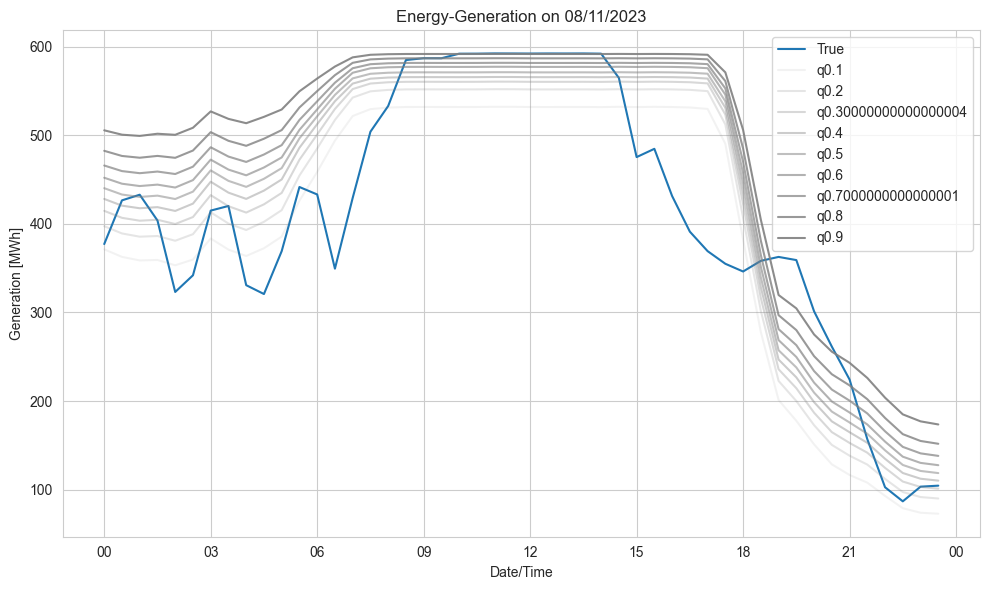

In [12]:
nn_wind.plot_quantils(feature_engineerer_wind.y_test.index, nn_wind.q_prediction_nn, quantiles, year = 2023, month = 11, day = 8)

In [13]:
torch.save(nn_wind.model.state_dict(), "wind_model_lstm_32_batch")

In [17]:
model = q_model2(quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], len_features = 74)
model.load_state_dict(torch.load("wind_model_lstm_32_batch", weights_only=True))
model.eval()

q_model2(
  (lstm1): LSTM(74, 20, num_layers=2, batch_first=True, dropout=0.3)
  (activation): ReLU()
  (final_layers): ModuleList(
    (0-8): 9 x Linear(in_features=20, out_features=1, bias=True)
  )
)

In [ ]:
nn_wind.plot_quantils(feature_engineerer_wind.y_test.index, nn_wind.q_prediction_nn, quantiles)

In [ ]:
import importlib
import Preprocessing
importlib.reload(Preprocessing)

import model_utils
import pandas as pd

merged_hornsea = pd.read_parquet("preprocessed_hornsea_with_energy.parquet")
merged_pes = pd.read_parquet("preprocessed_pes_with_energy.parquet")

feature_engineerer_wind = Preprocessing.FeatureEngineerer(label = 'Wind_MWh_credit', columns_to_ohe = ['unavailabilityType', 'affectedUnit'])
feature_engineerer_wind.perform_feature_engineering(merged_hornsea, deployment = False)

feature_engineerer_solar = Preprocessing.FeatureEngineerer(label = "Solar_MWh_credit")
feature_engineerer_solar.perform_feature_engineering(merged_pes, deployment = False)

merged_pes_simple = merged_pes[['solar_down_rad', 'Solar_MWh_credit', 'Wind_MWh_credit']]
feature_engineerer_solar_baseline = Preprocessing.FeatureEngineerer(label = 'Solar_MWh_credit')
feature_engineerer_solar_baseline.perform_feature_engineering(merged_pes_simple, deployment = False)

merged_hornsea_simple = merged_hornsea[['wind_speed_100', 'Solar_MWh_credit', 'Wind_MWh_credit']]
feature_engineerer_wind_baseline = Preprocessing.FeatureEngineerer(label = 'Wind_MWh_credit')
feature_engineerer_wind_baseline.perform_feature_engineering(merged_hornsea_simple, deployment = False)

import neural_networks
import numpy as np
importlib.reload(neural_networks)
from functools import partial
from itertools import chain
import torch
import torch.nn as nn
quantiles = np.arange(0.1, 1.0, 0.1)

nn_wind = neural_networks.Trainer(feature_engineerer_wind, neural_networks.q_model,quantiles)
nn_wind.train_and_test()

In [ ]:
nn_wind.plot_quantils(feature_engineerer_wind.y_test.index, nn_wind.q_prediction_nn, quantiles, year = 2023, month = 9, day = 15)

In [ ]:
import neural_networks
importlib.reload(neural_networks)
from functools import partial
from itertools import chain
import torch
import torch.nn as nn
quantiles = np.arange(0.1, 1.0, 0.1)

nn_solar = neural_networks.Trainer(feature_engineerer_solar, neural_networks.q_model, quantiles, in_shape=30)
nn_solar.train_and_test()

In [ ]:
nn_solar.plot_quantils(feature_engineerer_solar.y_test.index, nn_solar.q_prediction_nn, quantiles, day=8)

In [136]:
# source: https://github.com/TheQuantScientist/CNN-LSTM-AM/blob/main/src/CLAM.ipynb

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, LSTM, Dropout, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import backend as K
import tensorflow as tf

FORECAST_LENGTH = 1
SEQ_LENGTH = 1

# Define the Attention layer
@tf.keras.utils.register_keras_serializable()
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='attention_weight', shape=(input_shape[-1], 1), initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='attention_bias', shape=(input_shape[1], 1), initializer='zeros', trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        e = K.squeeze(e, axis=-1)
        alpha = K.softmax(e)
        alpha = K.expand_dims(alpha, axis=-1)
        context = x * alpha
        context = K.sum(context, axis=1)
        return context
    
# https://github.com/sachinruk/KerasQuantileModel/blob/master/Keras%20Quantile%20Model.ipynb
def tilted_loss(q,y,f):
    e = (y-f)
    return K.mean(K.maximum(q*e, (q-1)*e), axis=-1)

# Build the model
def create_model(input_shape, quantile):
    inputs = Input(shape=input_shape)
    
    x = Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')(inputs)
    x = Dropout(0.3)(x)
    x = Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
    x = Dropout(0.3)(x)

    x = LSTM(200, return_sequences=True)(x)
    x = Dropout(0.3)(x)
    x = LSTM(200, return_sequences=True)(x)
    x = Dropout(0.3)(x)
    x = LSTM(200, return_sequences=True)(x)
    x = Dropout(0.3)(x)

    #attention = Attention()(x)
    #outputs = Dense(FORECAST_LENGTH)(attention)
    
    outputs = Dense(1)(x)

    
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss=lambda y,f: tilted_loss(quantile, y, f),
                      #, metrics=[tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.RootMeanSquaredError()]
                                 )
        
    return model

all_models = dict()
for q in quantiles:
    model = create_model((SEQ_LENGTH, 74), quantile = q)

    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

    # Train the model
    history = model.fit(feature_engineerer_wind.X_train.reshape(-1, 1, 74), 
                        feature_engineerer_wind.y_train, 
                        epochs=20, batch_size=64, 
                        validation_data=(feature_engineerer_wind.X_val.reshape(-1, 1, 74), 
                                        feature_engineerer_wind.y_val),
                        callbacks=[early_stopping, reduce_lr])
    
    all_models[dict] = model
    model.save(f'CNN_LSTM_wind_model_quantile_{q}.h5')


# Evaluate the model


Epoch 1/20
625/625 [==============================] - 28s 40ms/step - loss: 25.2019 - val_loss: 21.8432 - lr: 0.0010
Epoch 2/20
625/625 [==============================] - 24s 38ms/step - loss: 20.8594 - val_loss: 18.3954 - lr: 0.0010
Epoch 3/20
625/625 [==============================] - 24s 38ms/step - loss: 18.0185 - val_loss: 16.5974 - lr: 0.0010
Epoch 4/20
625/625 [==============================] - 24s 39ms/step - loss: 15.8922 - val_loss: 14.6620 - lr: 0.0010
Epoch 5/20
625/625 [==============================] - 25s 39ms/step - loss: 14.1366 - val_loss: 13.9778 - lr: 0.0010
Epoch 6/20
625/625 [==============================] - 25s 39ms/step - loss: 12.9004 - val_loss: 13.3754 - lr: 0.0010
Epoch 7/20
625/625 [==============================] - 26s 42ms/step - loss: 11.9393 - val_loss: 13.0119 - lr: 0.0010
Epoch 8/20
625/625 [==============================] - 25s 40ms/step - loss: 11.1927 - val_loss: 12.1527 - lr: 0.0010
Epoch 9/20
625/625 [==============================] - 25s 41ms/s

c:\Users\danie\anaconda3\envs\awp2\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



Epoch 1/20
625/625 [==============================] - 27s 39ms/step - loss: 49.4644 - val_loss: 41.7358 - lr: 0.0010
Epoch 2/20
625/625 [==============================] - 23s 37ms/step - loss: 39.6705 - val_loss: 34.3996 - lr: 0.0010
Epoch 3/20
625/625 [==============================] - 23s 37ms/step - loss: 32.9217 - val_loss: 29.6899 - lr: 0.0010
Epoch 4/20
625/625 [==============================] - 23s 37ms/step - loss: 27.4911 - val_loss: 26.1628 - lr: 0.0010
Epoch 5/20
625/625 [==============================] - 23s 37ms/step - loss: 23.2622 - val_loss: 22.7796 - lr: 0.0010
Epoch 6/20
625/625 [==============================] - 23s 37ms/step - loss: 20.0616 - val_loss: 20.1669 - lr: 0.0010
Epoch 7/20
625/625 [==============================] - 23s 37ms/step - loss: 17.9114 - val_loss: 18.5218 - lr: 0.0010
Epoch 8/20
625/625 [==============================] - 23s 37ms/step - loss: 16.8410 - val_loss: 18.7281 - lr: 0.0010
Epoch 9/20
625/625 [==============================] - 23s 37ms/s

KeyboardInterrupt: 

In [167]:
pred_and_true = pd.DataFrame(index = feature_engineerer_wind.y_test.index)

for q in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    q = np.round(q, 1)
    m = tf.keras.saving.load_model(f"CNN_LSTM_wind_model_quantile_{q}.h5", compile = False)
    pred = m.predict(feature_engineerer_wind.X_test.reshape(-1, 1, 74))[:, 0]
    if len(pred.shape) > 2:
        pred = pred[:, 0]
    pred_and_true[str(q)] = pred

pred_and_true["true"] = feature_engineerer_wind.y_test

276/276 [==============================] - 1s 3ms/step


In [184]:
def pinball_score_nn_single(df, qu):
    score = model_utils.pinball(y=df["true"],
                             q=df[f"{qu}"],
                             alpha=qu).mean()
    return score

pinball_score_nn_single(pred_and_true, 0.5)

28.203032268615285

In [169]:
model_utils.pinball_score_nn(pred_and_true, quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

37.71626806653922

In [185]:
import plotly.express as px

px.line(pred_and_true, y = ["true", "0.5", "0.1", "0.9"])